In [1]:
from needle import plotHits, plotSubsetScores, plotNeedle
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import eden.graph as eg
import numpy as np
import yoda.ml.simpleMl as sml
import eden.display as ed
from yoda.alignments import load_rfam, filter_by_seqcount
from yoda import graphs as ygraphs
import needle
import yoda.alignments.clans as cl

from  sklearn.neighbors import KNeighborsClassifier
from kiez import Kiez


/home/ubuntu/.myconda/miniconda3/envs/yoda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

import matplotlib as mpl
mpl.rc("figure", dpi=100)

In [3]:
%%time
a,l = load_rfam(full= True, add_cov= False)


CPU times: user 5.79 s, sys: 6.84 s, total: 12.6 s
Wall time: 12.5 s


sum(l<1000)=4165 out of 4178


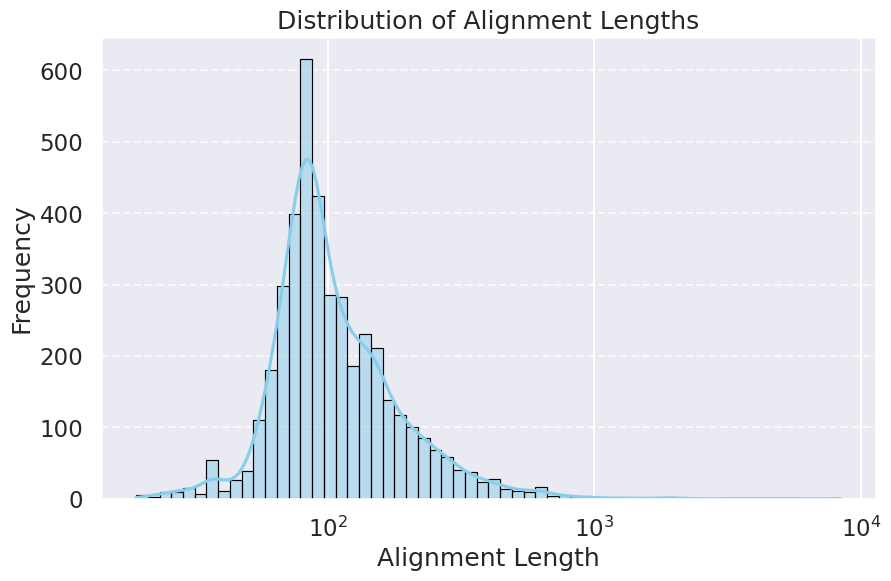

In [27]:
import cmcomp
cmcomp.hist(a)

In [5]:
# this is just to collect data to report in the paper
# asd= cl.get_label_dictionary(cl.clans_rfam15)
# asd= cl.get_label_dictionary(cl.clans)
# len(np.unique(list(asd.values()))) # 146
# len(asd) # 463

figpath =  !echo $HOME/pigplot/
figpath = figpath[0]
figpath


'/home/ubuntu/pigplot/'

In [6]:
import yoda.graphs as gr
matrix = gr.alignment_to_vectors(a)

In [7]:
a2,l2 = load_rfam(full= True, add_cov= False)
mat = ygraphs.vectorize_alignments(a)

In [19]:
# sml.average_precision(matrix,l)
import cmcomp 
ccmatrix = cmcomp.load_latest_cmcompare(l)

In [20]:
ccmatrix[:10,:10]

array([[  0.   , 208.282, 215.662, 216.605, 208.747, 216.069, 216.789,
        216.664, 213.874, 207.882],
       [208.282,   0.   , 215.062, 213.091, 214.016, 214.398, 210.075,
        214.526, 212.606, 206.603],
       [215.662, 215.062,   0.   , 205.402, 212.099, 219.221, 206.637,
        214.248, 214.877, 214.407],
       [216.605, 213.091, 205.402,   0.   , 210.262, 213.298, 211.557,
        213.59 , 209.311, 208.991],
       [208.747, 214.016, 212.099, 210.262,   0.   , 218.484, 208.207,
        210.686, 209.541, 208.464],
       [216.069, 214.398, 219.221, 213.298, 218.484,   0.   , 216.818,
        215.411, 210.749, 213.012],
       [216.789, 210.075, 206.637, 211.557, 208.207, 216.818,   0.   ,
        213.039, 213.569, 208.535],
       [216.664, 214.526, 214.248, 213.59 , 210.686, 215.411, 213.039,
          0.   , 212.936, 213.99 ],
       [213.874, 212.606, 214.877, 209.311, 209.541, 210.749, 213.569,
        212.936,   0.   , 209.661],
       [207.882, 206.603, 214.407, 20

<Axes: >

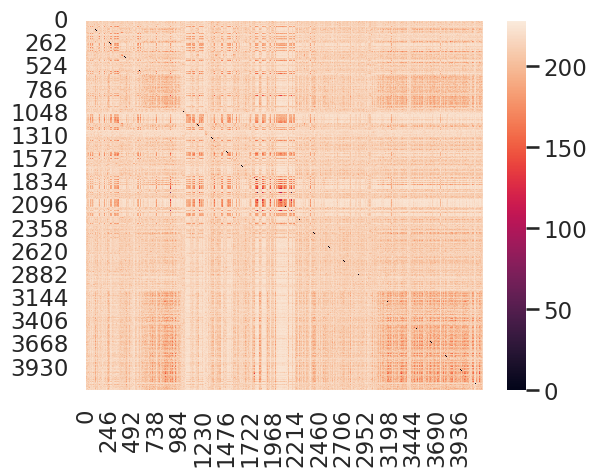

In [21]:
import seaborn as sns
sns.heatmap(ccmatrix)

ranker(ranks3)=[0.20759493670886076, 0.2582278481012658, 0.3037974683544304, 0.3265822784810127, 0.3468354430379747, 0.3721518987341772, 0.3949367088607595, 0.40759493670886077, 0.4253164556962025, 0.4379746835443038, 0.4506329113924051, 0.46835443037974683, 0.4860759493670886, 0.4962025316455696, 0.5037974683544304, 0.5113924050632911, 0.5189873417721519, 0.529113924050633, 0.5341772151898734, 0.5468354430379747, 0.5594936708860759, 0.5670886075949367, 0.579746835443038, 0.589873417721519, 0.6050632911392405, 0.6126582278481013, 0.620253164556962, 0.6278481012658228, 0.6379746835443038, 0.6379746835443038, 0.6481012658227848, 0.660759493670886, 0.660759493670886, 0.6632911392405063, 0.6658227848101266, 0.6658227848101266, 0.6708860759493671, 0.6708860759493671, 0.6784810126582278, 0.6911392405063291, 0.6936708860759494, 0.6987341772151898, 0.6987341772151898, 0.6987341772151898, 0.7012658227848101, 0.7113924050632912, 0.7164556962025317, 0.7189873417721518, 0.7240506329113924]
 sml.av

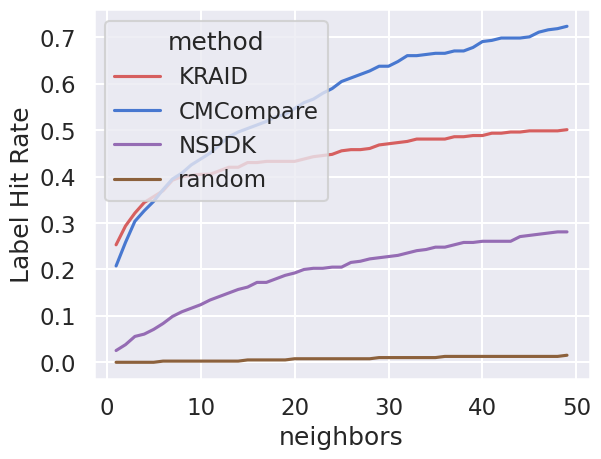

In [22]:
# PLOT importance weighted vectorization  vs normal vectorization , do we have at least 1 NN in the closest X instances?
ax = plotHits(matrix, mat, ccmatrix, l)
ax.get_figure().savefig(figpath + '4k_nspdk.png', bbox_inches='tight')

ranker(ranks3)=[0.13994910941475827, 0.17302798982188294, 0.1806615776081425, 0.18829516539440203, 0.19083969465648856, 0.1984732824427481, 0.20865139949109415, 0.21374045801526717, 0.22137404580152673, 0.22391857506361323, 0.23918575063613232, 0.24681933842239187, 0.24936386768447838, 0.25190839694656486, 0.25190839694656486, 0.25699745547073793, 0.25699745547073793, 0.2595419847328244, 0.26463104325699743, 0.26717557251908397, 0.272264631043257, 0.27989821882951654, 0.2824427480916031, 0.2875318066157761, 0.2900763358778626, 0.30025445292620867, 0.3053435114503817, 0.3104325699745547, 0.3104325699745547, 0.31806615776081426, 0.3256997455470738, 0.3333333333333333, 0.33587786259541985, 0.3384223918575064, 0.34096692111959287, 0.3460559796437659, 0.3460559796437659, 0.3511450381679389, 0.35368956743002544, 0.35368956743002544, 0.356234096692112, 0.35877862595419846, 0.37150127226463103, 0.37659033078880405, 0.38676844783715014, 0.39185750636132316, 0.3994910941475827, 0.402035623409669

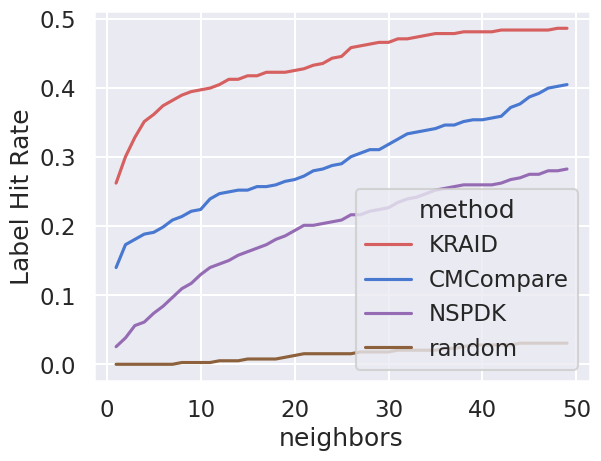

In [26]:
ax = plotHits(*cmcomp.filterdown(matrix, mat, ccmatrix,l,a))

In [12]:
# are there different successrates for more populated families?
manyseq, fewseq = filter_by_seqcount(a)
rf15Labels, burned  = cl.getlabels_rfam15(a)

# ax = plotSubsetScores(matrix, l, manyseq, fewseq, rf15Labels)
# ax.get_figure().savefig(figpath + '4k_alisize.png', bbox_inches='tight')
# plt.title('Hit Rate with full Rfam backdrop')

In [13]:
sum([1 for i,e in enumerate(rf15Labels) if i not in burned and e != 0])

54

In [14]:
# quick hack to compare the test set to the rest
from sklearn import metrics
pdist  = metrics.pairwise_distances(matrix)
# pdist = sml.CSLS(matrix)
print('all',sml.average_precision_nozero(pdist,l))
print('test',sml.average_precision(pdist,rf15Labels, burned))  # we will fix this in the future.. nozero doesnt know about the burn. this is annoying 
print('many',sml.average_precision_labelsubset(pdist,l, manyseq[:-1]))
print('few',sml.average_precision_labelsubset(pdist,l, fewseq[:-1]))
# print('random',np.mean([sml.average_precision_labelsubset(pdist,l, needle.randomhalf(l)) for x in range(20)]))


all 0.47680331484024235
test 0.33019660301192144
many 0.5485188122814822
few 0.44354893194109046


In [15]:
l

array([113,   0,  64, ...,   0,   0,   0])

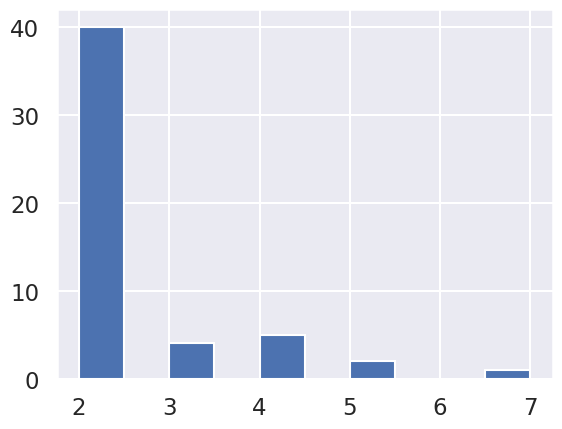

(array([30., 17., 12.,  1.,  2.,  4.,  2.,  3.,  0.,  1.]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

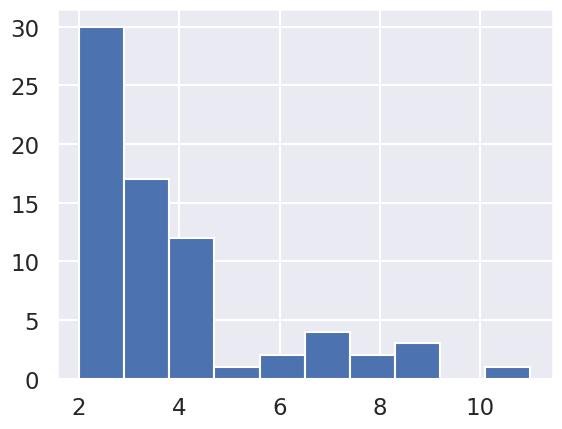

In [16]:
import collections

z = collections.Counter(l)
l1 = [ z[e] for e in manyseq[:-1]] 
l2 = [ z[e] for e in fewseq[:-1]] 

plt.hist(l1)
plt.show()
plt.hist(l2)


In [17]:
sum(np.array(list(z.values())) != 2)

57

# are two enough to find the rest?

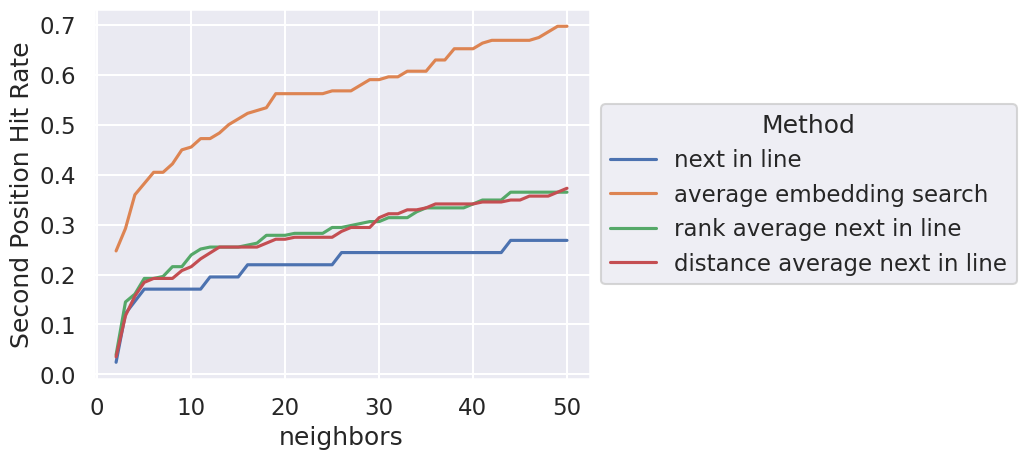

In [31]:


ax = needle.plotNeedle(matrix, l)
ax.get_figure().savefig(figpath + '4k_third.png', bbox_inches='tight')



In [34]:
sum(needle.threeinstances(l).values())

255

In [ ]:
# prints the closest hits  for each clan
# needle.clanExtend(matrix,l,a,max=30)

# END OF USABLE STUFF


In [ ]:
cm_dict_ab={}
cm_dict_ba={
}
with open('rfam-weakpairs','r') as f:
    for line in f:
        if line:
            sline = line.split(' ')
            cm_dict_ab[sline[0]+sline[1]] = line
            cm_dict_ba[sline[1]+sline[0]] = line

asdasdasdasdasd

In [ ]:
vec = eg.Vectorizer( min_r = 2,min_d=1)
import structout.intlistV2 as so 

def nice(values, colorids=[]):
    symbols = '▁▂▃▄▅▆▇█'
    values = np.array(values)
    values = so.binning(values, count = len(symbols), ylim=False)
    color = lambda x: '\x1b[1;3%d;48m%s\x1b[0m' % (1, x)
    if not colorids: 
        return ''.join([symbols[v] for v in values])
    else:
        return ''.join([symbols[v] if i not in colorids else color(symbols[v]) for i,v in enumerate(values)])


r = []
done = set()
needles = []
rowz = []
for i,ind in enumerate(neigh_ind):
    # we want r0 and r1 to be equal and >0.. 
    rowlabels = yy[ind]
    if rowlabels[0] == 0 or rowlabels[0]!=rowlabels[1]:
       continue 
    # we want 
    c,d = ind[0], ind[1]
    if (c,d) in done:
        continue
    else:
        done.add((d,c))
    
    needle = np.array([ (a + b) /2  for a,b in zip(matrix[c].toarray()[0],matrix[d].toarray()[0])])
    needles.append(needle)
    rowz.append((i,c,d))
    #input = np.log1p(matrix[[c,d],:])
    #needle = np.asarray(np.sum(input, axis = 0))[0]
    #input = matrix[[c,d],:]
    #needle = np.asarray(np.sum(input, axis = 0))[0]
    # FAB
    #index_helper = np.array([((a+b)/2) if a and b else 0 for a,b in zip(matrix[c].toarray()[0],matrix[d].toarray()[0]) ])
    # needle = np.array([(a+b)/2 for a,b in zip(matrix[c].toarray()[0],matrix[d].toarray()[0]) if a and b])
    #indices = np.argsort(-np.dot(matrix.todense()[:, index_helper > 0] , needle.T )).A1 [:50]
    
    # dist, indices = k_inst.kneighbors([needle])
    
k_inst = Kiez(algorithm='SklearnNN', hubness='csls',  n_candidates = 100,  
              algorithm_kwargs= {'metric' : 'cosine'})
k_inst.fit(np.array(needles),matrix.toarray() )
dist, indices2 = k_inst.kneighbors()

for indices,rid in zip( indices2, rowz):
    i,c,d = rid
    # CLASS IDS 
    r.append(str(yy[indices]))
    print(r[-1])
    # RFAM IDS 
    # IMPORTANCES
    for i in indices[:10]: # FIST 20 HITS 
        graph = graphss[i]
        seqid_scr = {}
        for n,ve in zip(graph.nodes, vec.vertex_transform([graph])[0]):
            seqid_scr[n]= (ve*needle)[0]
        score_per_nucleotide = [ seqid_scr.get(j,0) for j in range(a[i].alignment.shape[1])]


        conserved = [ nid for nid,di in graphss[i].nodes(data=True) if di['weight']> .5]
        #### print per entry... 
        # NAME,  score 
        # position score + highlight 
        # structure line 
        # 5 ali lines 
        # newline 
        r.append(f"{a[i].gf['DE']} {a[i].gf['ID']}") # ! score later 
        # print(r[-1])
        r.append(f"{nice(score_per_nucleotide, conserved)}") 
        # print(r[-1])
        r.append(f"{a[i].gc['SS_cons']}") 
        # print(r[-1])
        for row in a[i].alignment[:5]:
            r.append(f'{"".join(row)}') 
        # print(r[-1])

        labels = a[c].label, a[i].label
        k = '%s.cm%s.cm' % labels
        r.append(cm_dict_ab.get(k,'None'))
        r.append(cm_dict_ba.get(k,'None'))
        labels = a[d].label, a[i].label
        k = '%s.cm%s.cm' % labels
        r.append(cm_dict_ab.get(k,'None'))
        r.append(cm_dict_ba.get(k,'None'))
        r.append(f'') 
        
    def id_to_gr(id):
        graph = graphs[id]
        for n,ve in zip(graph.nodes, vec.vertex_transform([graph])[0]):
            graph.nodes[n]['asd']= ve*needle
        return graph
    #gra = list(map( id_to_gr, indices[0][:5]))
    # ed.draw_graph_row(gra, vertex_color = 'asd') 
    def draw(g):
        if len(g) < 400: 
            ed.draw_graph(g, vertex_color = 'asd', secondary_vertex_color = 'weight') ; plt.show()
        else:
            print("TOO LARGE TO DRAW")
    # [draw(g) for g in gra]




In [ ]:
r

In [ ]:
np.array(needles).shape

In [ ]:
matrix.toarray().shape

In [ ]:
r[2]

In [ ]:
r = [e if e is not None else "None" for e in r]

In [ ]:
with open('data.txt','w') as file:
    file.write('\n'.join(r))
!cat data.txt | aha > data.html

In [ ]:
import sklearn
sklearn.__file__

In [ ]:
# CAN WE FIND NEW INSTANCES OF A CLUSTER IF WE PROVIDE THE WHOLE CLUSTER?

knn = KNeighborsClassifier(n_neighbors=100)
yy= np.array(l)
knn.fit(matrix ,yy)

y_needle =  {}

for y in np.unique(yy): 
    if y > 0:
        # pairwise search ... 
        indices = np.where (yy==y)[0]
        for a,b in [(i,j) for enu,i in enumerate(indices) for j in indices[enu+1:]]:
            input = np.log1p(matrix[[c,d],:])
            needle = np.asarray(np.sum(input, axis = 0))[0]           
        
    
        
        # input = matrix[yy == y]
        # needle = np.asarray(np.all((input > 0).todense(), axis = 0))
        
        dist, indices = knn.kneighbors(needle)
        print(y)
        print(yy[indices])
        print(dist)
        y_needle[y] = (needle, indices) 


In [ ]:
def show(y):
    needle, indices = y_needle[y]
    def id_to_gr(id):
        graph = graphs[id]
        for n,ve in zip(graph.nodes, vec.vertex_transform([graph])[0]):
            graph.nodes[n]['asd']= ve*needle[0]
        return graph
    gra = list(map( id_to_gr, indices[0][:5]))
    # ed.draw_graph_row(gra, vertex_color = 'asd') 
    
    def draw(g):
        if len(g) < 300: 
            ed.draw_graph(g, vertex_color = 'asd', secondary_vertex_color = 'weight') ; plt.show()
        else:
            print("TOO LARGE TO DRAW")
    [draw(g) for g in gra]


show(8)


In [ ]:
>>> rng = np.random.RandomState(0)
>>> source = rng.rand(61,65537)
>>> target = rng.rand(4108,65537)


# Step 2: Create a Kiez object
kiezz = Kiez(hubness='localscaling')  # 'ls' stands for Local Scaling, you can also use 'mp' for Mutual Proximity

# Step 3: Fit the Kiez object to your data
kiezz.fit(source)

# Step 4: Transform the data to get hubness-corrected distances
X_corrected = kiez.transform(source)

# Step 5: Convert the corrected data to a distance matrix
#distance_matrix = nn.kneighbors_graph(X_corrected, mode='distance').toarray()

In [ ]:
nn_ind.shap

In [ ]:
import numpy as np

a = np.arange(10)

a+=4

np.where(a < 6)[0]

In [ ]:
from scipy.stats import binom

In [ ]:
weights = [5,2,1]
values = [50, 10, 20]
z=[v for s, v in zip(weights, values) for _ in range(int(s))]

In [ ]:
np.mean(z), np.std(z)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

# Generate test data
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 100)
y = np.concatenate((2 * x[:30], np.full(70,  10))) + np.random.normal(0, 1, x.shape)

# Calculate mutual information
# To compute mutual information, we need to discretize the continuous variables
# Here we use a simple binning approach
x_bins = np.histogram_bin_edges(x, bins=10)
y_bins = np.histogram_bin_edges(y, bins=10)

# Discretize x and y
x_digitized = np.digitize(x, x_bins)
y_digitized = np.digitize(y, y_bins)

# Calculate mutual information score
mi_score = mutual_info_score(x_digitized, y_digitized)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points', alpha=0.6)
plt.title('Test Data: y vs. x (Constant Second Half)')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

# Print the mutual information score
print(f'Mutual Information Score: {mi_score:.4f}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

# Generate test data
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 100)

y = np.concatenate((2 * x[:50], 2 * (10 - x[50:]))) + np.random.normal(0, 1, x.shape)

# Calculate mutual information
# To compute mutual information, we need to discretize the continuous variables
# Here we use a simple binning approach
x_bins = np.histogram_bin_edges(x, bins=10)
y_bins = np.histogram_bin_edges(y, bins=10)

# Discretize x and y
x_digitized = np.digitize(x, x_bins)
y_digitized = np.digitize(y, y_bins)

# Calculate mutual information score
mi_score = mutual_info_score(x_digitized, y_digitized)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points', alpha=0.6)
plt.title('Test Data: y vs. x')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

# Print the mutual information score
print(f'Mutual Information Score: {mi_score:.4f}')